<table style="width:100%; border-collapse: collapse;">
  <tr>
    <td style="width:20%; vertical-align:middle;">
      <img src="LogoUVG.png" width="400"/>
    </td>
    <td style="text-align:left; vertical-align:middle;">
      <h2 style="margin-bottom: 0;">Universidad del Valle de Guatemala - UVG</h2>
      <h3 style="margin-top: 0;">Facultad de Ingeniería - Computación</h3>
      <p style="font-size: 16px; margin-bottom: 0; margin-top: -20px">
        <strong>Curso:</strong> Visión por Computadora 
        <strong>Sección:</strong> 10
      </p>
      <p style="font-size: 16px; margin: 0;"><strong>Proyecto 3:</strong> Constructor de imágenes panorámicas</p>
      <br>
      <p style="font-size: 15px; margin: 0;"><strong>Autores:</strong></p>
      <ul style="margin-top: 5px; padding-left: 20px; font-size: 15px;">
        <li>Diego Alexander Hernández Silvestre - <strong>21270</strong></li>
        <li>Linda Inés Jiménez Vides - <strong>21169</strong></li>
        <li>José Andrés Auyón Cobar - <strong>201579</strong></li>
      </ul>
    </td>
  </tr>
</table>


#### Librerias 📚

In [28]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Inciso 1 🗂️

In [29]:
central = cv.imread('data/images/boat2.jpg')
left    = cv.imread('data/images/boat1.jpg')
right   = cv.imread('data/images/boat3.jpg')

Inciso 2 🗂️

In [30]:
sift = cv.SIFT_create()

# Central image SIFT keypoints
grayc = cv.cvtColor(central, cv.COLOR_BGR2GRAY)
kpc, desc = sift.detectAndCompute(grayc, None)
central=cv.drawKeypoints(grayc, kpc, central, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('CENTRAL_SIFT_KEYPOINTS.jpg',central)

# Left image SIFT keypoints
gray= cv.cvtColor(left, cv.COLOR_BGR2GRAY)
kpl, desl = sift.detectAndCompute(gray, None)
left=cv.drawKeypoints(gray, kpl, left, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('LEFT_SIFT_KEYPOINTS.jpg',left)

# Right image SIFT keypoints
gray= cv.cvtColor(right, cv.COLOR_BGR2GRAY)
kpr, desr = sift.detectAndCompute(gray, None)
right=cv.drawKeypoints(gray, kpr, right, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('RIGHT_SIFT_KEYPOINTS.jpg',right)

True

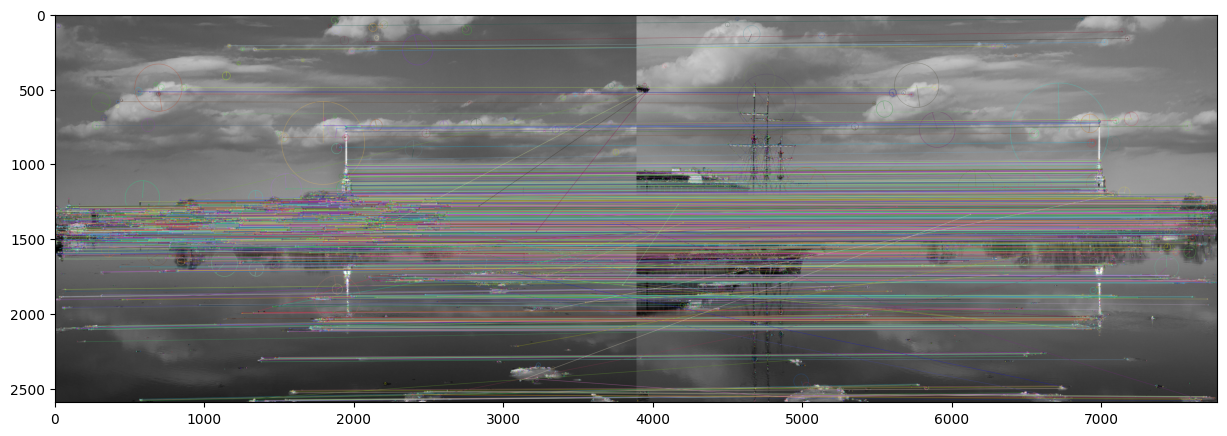

In [31]:
bf = cv.BFMatcher()
matches = bf.knnMatch(desc, desl, k=2)
 
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
 
matcherResult = cv.drawMatchesKnn(central, kpc, left, kpl, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.figure(figsize=(15, 10))
plt.imshow(matcherResult)
plt.show()

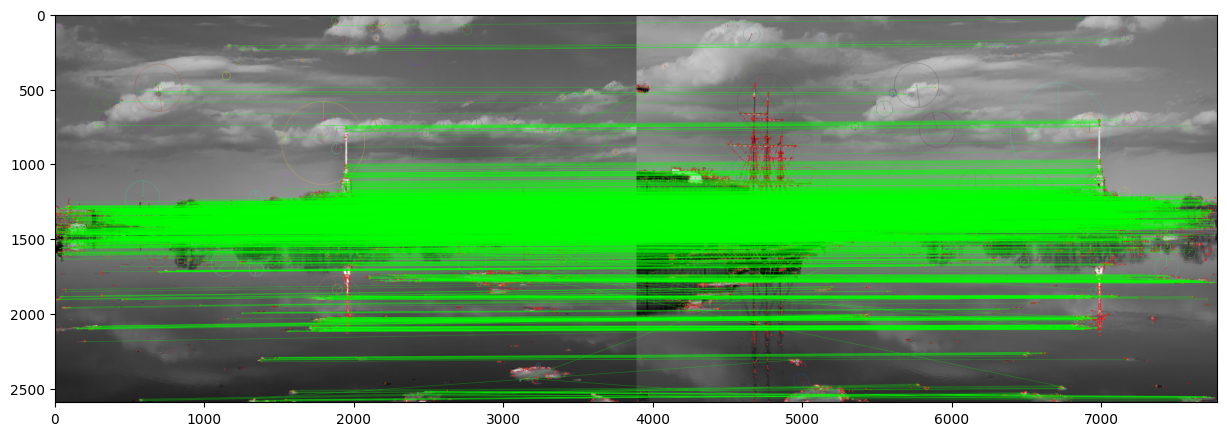

In [32]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
 
flann = cv.FlannBasedMatcher(index_params,search_params)
 
matches = flann.knnMatch(desc,desl,k=2)
 
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
 
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
 
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
 
img3 = cv.drawMatchesKnn(central, kpc, left, kpl,matches,None,**draw_params)
 
plt.figure(figsize=(15, 10))
plt.imshow(img3)
plt.show()

In [33]:
MIN_MATCH_COUNT = 10

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 100)
search_params = dict(checks=50) 
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(desc,desl,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [34]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kpc[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpl[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
 
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
 
    h, w = central.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
 
    left = cv.polylines(left,[np.int32(dst)],True,255,3, cv.LINE_AA)
 
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

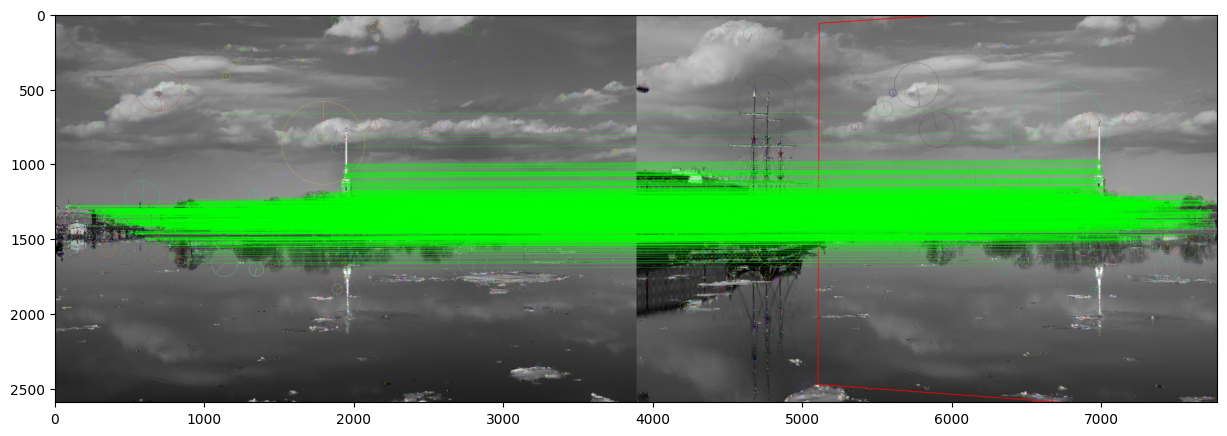

In [35]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv.drawMatches(central,kpc,left,kpl,good,None,**draw_params)

plt.figure(figsize=(15, 10))
plt.imshow(img3)
plt.show()

Inciso 3 🗂️

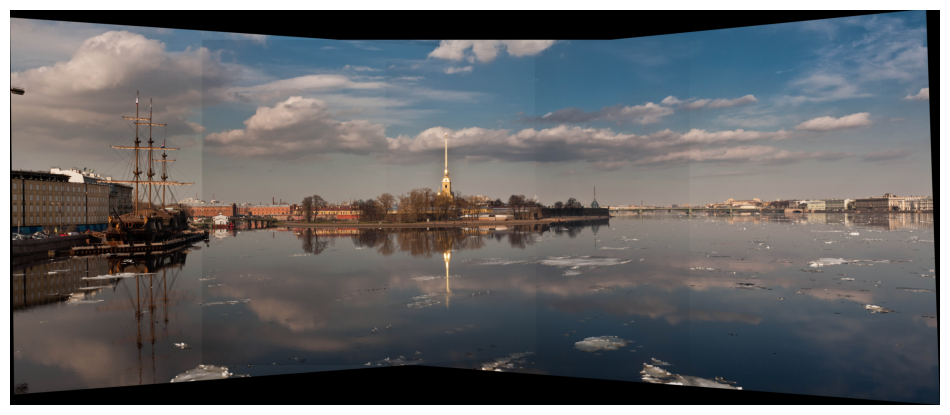

In [38]:

central = cv.imread('data/images/boat2.jpg')
left    = cv.imread('data/images/boat1.jpg')
right   = cv.imread('data/images/boat3.jpg')

sift2 = cv.SIFT_create()

def detect_and_compute(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    kp, des = sift2.detectAndCompute(gray, None)
    return kp, des

kpc, desc_c = detect_and_compute(central)
kpl, desc_l = detect_and_compute(left)
kpr, desc_r = detect_and_compute(right)

# ============================
# 3) Matching + Homografías (DLT + RANSAC)
# ============================
def compute_homography(kp_src, des_src, kp_dst, des_dst,
                       ratio=0.75, min_matches=10):
    flann = cv.FlannBasedMatcher(dict(algorithm=1, trees=5), dict(checks=50))
    matches = flann.knnMatch(des_src, des_dst, k=2)
    good = [m for m,n in matches if m.distance < ratio * n.distance]
    if len(good) < min_matches:
        raise RuntimeError(f"Pocos matches: {len(good)}/{min_matches}")
    src_pts = np.float32([kp_src[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp_dst[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    H, _ = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    return H.astype(np.float32)

# calculamos las homografías left→central y right→central
H_left  = compute_homography(kpl, desc_l, kpc, desc_c)
H_right = compute_homography(kpr, desc_r, kpc, desc_c)

# ============================
# 4) Warping + Blending
# ============================
# 4.1) Determinar el tamaño del canvas
h_c, w_c = central.shape[:2]
h_l, w_l = left.shape[:2]
h_r, w_r = right.shape[:2]

corners_c = np.float32([[0,0],[0,h_c],[w_c,h_c],[w_c,0]]).reshape(-1,1,2)
corners_l = np.float32([[0,0],[0,h_l],[w_l,h_l],[w_l,0]]).reshape(-1,1,2)
corners_r = np.float32([[0,0],[0,h_r],[w_r,h_r],[w_r,0]]).reshape(-1,1,2)

proj_l = cv.perspectiveTransform(corners_l, H_left)
proj_r = cv.perspectiveTransform(corners_r, H_right)

all_pts = np.vstack((corners_c, proj_l, proj_r))
[x_min, y_min] = np.int32(all_pts.min(axis=0).ravel() - 0.5)
[x_max, y_max] = np.int32(all_pts.max(axis=0).ravel() + 0.5)

offset   = [-x_min, -y_min]
canvas_w = x_max - x_min
canvas_h = y_max - y_min

# 4.2) Matriz de traslación para desplazar todo al canvas
T = np.array([[1, 0, offset[0]],
              [0, 1, offset[1]],
              [0, 0,        1   ]], dtype=np.float32)

# 4.3) Creamos acumuladores para blending por promedio
accumulator = np.zeros((canvas_h, canvas_w, 3), dtype=np.float32)
count_map   = np.zeros((canvas_h, canvas_w),      dtype=np.float32)

# función auxiliar: warp + acumular
def warp_and_accumulate(img, H):
    M = T.dot(H)                  # combina traslación + homografía
    warped = cv.warpPerspective(
        img, M, (canvas_w, canvas_h),
        flags=cv.INTER_LINEAR,
        borderMode=cv.BORDER_CONSTANT,
        borderValue=(0,0,0)
    )
    mask = (warped.sum(axis=2) > 0)  # píxeles válidos
    accumulator[mask] += warped[mask]
    count_map[mask]   += 1

# 4.4) Aplica para cada vista
#   - Central → identidad (solo traslación)
warp_and_accumulate(central, np.eye(3, dtype=np.float32))
#   - Left → central
warp_and_accumulate(left, H_left)
#   - Right → central
warp_and_accumulate(right, H_right)

# 4.5) Construye panorama final: promedio donde count_map>0
# evitar división por cero:
valid = count_map > 0
result = np.zeros_like(accumulator, dtype=np.uint8)
result[valid] = (accumulator[valid] / count_map[valid,None]).astype(np.uint8)

# 4.6) Guarda y muestra
cv.imwrite('panorama_blended.png', result)
plt.figure(figsize=(12,6))
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Inciso 4 🗂️